

# THIS PROGRAM GIVES FIVE DAY AVWAP FOR A GIVEN TICKER



In [1]:
#import libraries

import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from functools import reduce
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:

def get_avawp(df,date):
  '''
  returns the anchored vwap in the form of list
  for given data frame based on closing price and volume
  begining with given date

  '''
  df=df[df['Date']>=date]
  price_cum_sum=(df['Close']*df['Volume']).cumsum() #cumsum of close*volume
  vol_cum_sum=df['Volume'].cumsum()                 #cumsum of vol
  #d='avwap'+date.replace('-','')
  d='avwap|'+date#.replace('-','')
  df[d]=(price_cum_sum/vol_cum_sum).round(2)

  return df[['Date',d]]

In [3]:
date_val=datetime.now().strftime('%D')
date_val

'12/08/24'

In [4]:
def get_merged_vwap(df):
  '''
  it returns a single dataframe with vwaps for given dates
  '''
  df=df.reset_index()
  all_df=[]

  unique_dates=list(df.Datetime.dt.date.unique())  #unique dates
  #print(f"unique-dates: {unique_dates}")

  for i in range(len(unique_dates)):
    temp_df=df[df['Datetime'].dt.date>=unique_dates[i]][['Ticker','Datetime','Close','Volume']]
    temp_df[f'avwap{i}']=(temp_df['Volume']*temp_df['Close']).cumsum()/temp_df['Volume'].cumsum()
    all_df.append(temp_df)
    #print(f'{i+1}')#\n{temp_df}')
    #display(temp_df)


  #merging the dataframes
  merged_dfs = reduce(lambda left,right: pd.merge(left, right, on=['Ticker','Datetime','Close','Volume'], how='left'), all_df).drop(columns=['Volume'])
  #display(merged_dfs.head(10))
  return merged_dfs.round(2)

# ENTER INTERESTED TICKERS HERE !

In [5]:
symbols = 'TSLA NVDA MSFT GOOGL AMZN AAPL META SMCI AMD COIN MSTR'

print(f'Fetching data for: {symbols}')

Fetching data for: TSLA NVDA MSFT GOOGL AMZN AAPL META SMCI AMD COIN MSTR


In [6]:
#Downloading the ticker values for 5 days
#Download 1-minute intraday data

data = yf.download(symbols, period='5d', interval="1m")


# Print the fetched data
print(data.head())


[*********************100%***********************]  11 of 11 completed


Price                       Adj Close                                      \
Ticker                           AAPL         AMD        AMZN        COIN   
Datetime                                                                    
2024-12-02 14:30:00+00:00  238.700897  138.158401  210.559998  302.679993   
2024-12-02 14:31:00+00:00  239.000000  138.740005  211.419998  302.809998   
2024-12-02 14:32:00+00:00  238.934601  139.164993  211.710098  303.100098   
2024-12-02 14:33:00+00:00  239.110001  139.190002  212.114304  305.225006   
2024-12-02 14:34:00+00:00  239.296295  139.616501  211.709900  304.299988   

Price                                                                      \
Ticker                          GOOGL        META        MSFT        MSTR   
Datetime                                                                    
2024-12-02 14:30:00+00:00  169.179993  576.780029  422.170013  397.499298   
2024-12-02 14:31:00+00:00  169.830002  579.929993  423.070007  397.139893  

In [7]:
#changing the format of the data table

temp_df=data.stack(1).rename_axis(['Datetime','Ticker']).reset_index(level=1)
temp_df

<ipython-input-7-79e9c48895a4>:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  temp_df=data.stack(1).rename_axis(['Datetime','Ticker']).reset_index(level=1)


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,AAPL,238.700897,238.700897,238.770004,237.160004,237.270004,2562715
2024-12-02 14:30:00+00:00,AMD,138.158401,138.158401,138.304993,137.830002,137.850006,1143858
2024-12-02 14:30:00+00:00,AMZN,210.559998,210.559998,210.600006,209.510101,209.960007,2419303
2024-12-02 14:30:00+00:00,COIN,302.679993,302.679993,302.900787,300.510010,302.621002,866428
2024-12-02 14:30:00+00:00,GOOGL,169.179993,169.179993,169.440002,168.570007,168.725006,972861
...,...,...,...,...,...,...,...
2024-12-06 20:59:00+00:00,MSFT,443.519989,443.519989,444.040009,443.359985,443.619995,655107
2024-12-06 20:59:00+00:00,MSTR,395.220001,395.220001,395.890015,394.904999,394.959991,272183
2024-12-06 20:59:00+00:00,NVDA,142.399994,142.399994,142.479996,142.320007,142.384995,2460009


In [8]:
#grouping based on the tickers
grouped=temp_df.groupby('Ticker')
group_keys=grouped.groups.keys()
group_keys

dict_keys(['AAPL', 'AMD', 'AMZN', 'COIN', 'GOOGL', 'META', 'MSFT', 'MSTR', 'NVDA', 'SMCI', 'TSLA'])

In [9]:
#individual tickers
for i in group_keys:
  group=grouped.get_group(i)
  display(group)

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,AAPL,238.700897,238.700897,238.770004,237.160004,237.270004,2562715
2024-12-02 14:31:00+00:00,AAPL,239.000000,239.000000,239.059906,238.399994,238.690002,418941
2024-12-02 14:32:00+00:00,AAPL,238.934601,238.934601,239.350006,238.910004,238.960007,213308
2024-12-02 14:33:00+00:00,AAPL,239.110001,239.110001,239.199997,238.729996,238.929993,192847
2024-12-02 14:34:00+00:00,AAPL,239.296295,239.296295,239.350006,238.929993,239.080093,200970
...,...,...,...,...,...,...,...
2024-12-06 20:55:00+00:00,AAPL,242.699997,242.699997,242.940002,242.565002,242.595001,570072
2024-12-06 20:56:00+00:00,AAPL,242.690002,242.690002,242.850006,242.199997,242.695007,319574
2024-12-06 20:57:00+00:00,AAPL,242.669998,242.669998,242.759995,242.619995,242.690002,276410


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,AMD,138.158401,138.158401,138.304993,137.830002,137.850006,1143858
2024-12-02 14:31:00+00:00,AMD,138.740005,138.740005,139.000000,138.059998,138.119995,221474
2024-12-02 14:32:00+00:00,AMD,139.164993,139.164993,139.259995,138.557693,138.660004,208731
2024-12-02 14:33:00+00:00,AMD,139.190002,139.190002,139.559998,138.929993,139.149994,255421
2024-12-02 14:34:00+00:00,AMD,139.616501,139.616501,139.720001,139.179993,139.183197,187012
...,...,...,...,...,...,...,...
2024-12-06 20:55:00+00:00,AMD,138.735992,138.735992,138.740005,138.365005,138.369995,222200
2024-12-06 20:56:00+00:00,AMD,138.779999,138.779999,138.899994,138.660995,138.725006,263351
2024-12-06 20:57:00+00:00,AMD,138.710007,138.710007,138.759995,138.644699,138.759995,162644


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,AMZN,210.559998,210.559998,210.600006,209.510101,209.960007,2419303
2024-12-02 14:31:00+00:00,AMZN,211.419998,211.419998,211.520004,210.559998,210.610001,499077
2024-12-02 14:32:00+00:00,AMZN,211.710098,211.710098,211.830002,211.373001,211.400803,352335
2024-12-02 14:33:00+00:00,AMZN,212.114304,212.114304,212.127197,211.220001,211.729904,451822
2024-12-02 14:34:00+00:00,AMZN,211.709900,211.709900,212.169998,211.503998,212.115005,260944
...,...,...,...,...,...,...,...
2024-12-06 20:55:00+00:00,AMZN,226.949905,226.949905,227.000000,226.690002,226.720001,316000
2024-12-06 20:56:00+00:00,AMZN,226.889999,226.889999,226.940002,226.679993,226.940002,298758
2024-12-06 20:57:00+00:00,AMZN,226.949997,226.949997,226.979996,226.869995,226.884995,307635


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,COIN,302.679993,302.679993,302.900787,300.510010,302.621002,866428
2024-12-02 14:31:00+00:00,COIN,302.809998,302.809998,303.880005,301.770111,302.059998,80447
2024-12-02 14:32:00+00:00,COIN,303.100098,303.100098,304.358490,302.790009,303.107910,78955
2024-12-02 14:33:00+00:00,COIN,305.225006,305.225006,305.470001,303.030396,303.269989,99728
2024-12-02 14:34:00+00:00,COIN,304.299988,304.299988,305.739899,304.260010,305.299988,65347
...,...,...,...,...,...,...,...
2024-12-06 20:55:00+00:00,COIN,342.690002,342.690002,343.000000,341.790009,342.040009,83872
2024-12-06 20:56:00+00:00,COIN,343.029999,343.029999,343.355896,342.559998,342.730011,57128
2024-12-06 20:57:00+00:00,COIN,343.570007,343.570007,343.570007,342.920013,342.970001,82380


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,GOOGL,169.179993,169.179993,169.440002,168.570007,168.725006,972861
2024-12-02 14:31:00+00:00,GOOGL,169.830002,169.830002,169.860001,169.100006,169.160004,113982
2024-12-02 14:32:00+00:00,GOOGL,169.389999,169.389999,170.220001,169.389999,169.820007,209283
2024-12-02 14:33:00+00:00,GOOGL,169.809906,169.809906,169.809906,169.279999,169.442902,95637
2024-12-02 14:34:00+00:00,GOOGL,169.889999,169.889999,170.070007,169.595001,169.779999,129044
...,...,...,...,...,...,...,...
2024-12-06 20:55:00+00:00,GOOGL,174.820007,174.820007,174.889999,174.529999,174.529999,190791
2024-12-06 20:56:00+00:00,GOOGL,174.785004,174.785004,174.830002,174.716293,174.830002,85247
2024-12-06 20:57:00+00:00,GOOGL,174.818100,174.818100,174.830002,174.774994,174.785004,102499


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,META,576.780029,576.780029,577.489990,575.570007,577.335022,275607
2024-12-02 14:31:00+00:00,META,579.929993,579.929993,580.340027,576.762512,576.789978,129209
2024-12-02 14:32:00+00:00,META,579.830017,579.830017,580.169983,578.601929,579.919983,59073
2024-12-02 14:33:00+00:00,META,582.830017,582.830017,582.844971,579.909973,579.909973,86599
2024-12-02 14:34:00+00:00,META,583.587524,583.587524,583.750000,582.400024,582.755005,76592
...,...,...,...,...,...,...,...
2024-12-06 20:55:00+00:00,META,624.150024,624.150024,624.150024,623.190674,623.190674,69705
2024-12-06 20:56:00+00:00,META,624.460022,624.460022,624.500000,623.989990,624.195007,67764
2024-12-06 20:57:00+00:00,META,624.140015,624.140015,624.460022,623.993103,624.460022,87409


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,MSFT,422.170013,422.170013,422.239990,421.309998,421.540009,612930
2024-12-02 14:31:00+00:00,MSFT,423.070007,423.070007,423.149994,421.519989,422.239990,79202
2024-12-02 14:32:00+00:00,MSFT,422.950012,422.950012,423.839996,422.850006,422.994995,72272
2024-12-02 14:33:00+00:00,MSFT,424.320007,424.320007,424.380005,422.709991,422.929993,55943
2024-12-02 14:34:00+00:00,MSFT,424.589996,424.589996,424.730011,424.265900,424.390015,56819
...,...,...,...,...,...,...,...
2024-12-06 20:55:00+00:00,MSFT,443.929993,443.929993,444.350006,443.795013,443.795013,85183
2024-12-06 20:56:00+00:00,MSFT,443.670013,443.670013,443.979889,443.640015,443.979889,62783
2024-12-06 20:57:00+00:00,MSFT,443.790009,443.790009,443.825012,443.480011,443.679993,90756


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,MSTR,397.499298,397.499298,398.708191,392.661407,393.734985,1882341
2024-12-02 14:31:00+00:00,MSTR,397.139893,397.139893,397.890015,394.089996,397.000000,139317
2024-12-02 14:32:00+00:00,MSTR,395.799988,395.799988,397.299988,395.799988,397.000000,122116
2024-12-02 14:33:00+00:00,MSTR,394.770599,394.770599,396.540009,393.500000,395.600006,133660
2024-12-02 14:34:00+00:00,MSTR,392.575012,392.575012,395.570007,392.109985,394.994995,101124
...,...,...,...,...,...,...,...
2024-12-06 20:55:00+00:00,MSTR,395.250000,395.250000,396.279999,394.730011,395.000000,138230
2024-12-06 20:56:00+00:00,MSTR,395.020691,395.020691,395.609985,394.880005,395.424988,129670
2024-12-06 20:57:00+00:00,MSTR,394.755005,394.755005,395.499908,394.619995,395.109985,236126


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,NVDA,138.505005,138.505005,138.839996,138.360001,138.839996,13148380
2024-12-02 14:31:00+00:00,NVDA,138.615005,138.615005,138.880005,138.320007,138.505005,1121651
2024-12-02 14:32:00+00:00,NVDA,138.358307,138.358307,139.070007,138.330002,138.600006,1468282
2024-12-02 14:33:00+00:00,NVDA,138.505005,138.505005,138.690002,138.089996,138.339996,1262637
2024-12-02 14:34:00+00:00,NVDA,138.690002,138.690002,138.919907,138.520004,138.520004,1012682
...,...,...,...,...,...,...,...
2024-12-06 20:55:00+00:00,NVDA,142.350006,142.350006,142.399994,142.125000,142.125000,1040124
2024-12-06 20:56:00+00:00,NVDA,142.345001,142.345001,142.369995,142.240005,142.359207,495506
2024-12-06 20:57:00+00:00,NVDA,142.360504,142.360504,142.380005,142.270004,142.350006,594087


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,SMCI,37.560001,37.560001,37.849998,37.099998,37.730000,18275829
2024-12-02 14:31:00+00:00,SMCI,36.400002,36.400002,37.689999,36.360001,37.638000,2241934
2024-12-02 14:32:00+00:00,SMCI,37.299999,37.299999,37.419998,36.360001,36.404999,1756453
2024-12-02 14:33:00+00:00,SMCI,37.160000,37.160000,37.520000,36.630001,37.299999,1461406
2024-12-02 14:34:00+00:00,SMCI,36.859901,36.859901,37.160000,36.709999,37.154999,834634
...,...,...,...,...,...,...,...
2024-12-06 20:55:00+00:00,SMCI,44.000000,44.000000,44.150002,43.990002,44.014999,417747
2024-12-06 20:56:00+00:00,SMCI,44.025002,44.025002,44.055000,43.950001,44.000000,233574
2024-12-06 20:57:00+00:00,SMCI,43.940201,43.940201,44.040001,43.900002,44.025002,318211


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,,
2024-12-02 14:30:00+00:00,TSLA,354.269989,354.269989,354.890015,352.060089,352.515015,4803576
2024-12-02 14:31:00+00:00,TSLA,355.570007,355.570007,357.600006,353.924988,354.140015,1273753
2024-12-02 14:32:00+00:00,TSLA,357.739990,357.739990,358.200012,355.130005,355.500000,1117546
2024-12-02 14:33:00+00:00,TSLA,358.179993,358.179993,358.779999,357.019989,357.543701,774525
2024-12-02 14:34:00+00:00,TSLA,357.843597,357.843597,358.425415,357.519989,358.114990,503947
...,...,...,...,...,...,...,...
2024-12-06 20:55:00+00:00,TSLA,388.600006,388.600006,388.880005,387.369995,387.369995,818552
2024-12-06 20:56:00+00:00,TSLA,389.276001,389.276001,389.299988,388.420013,388.700012,633066
2024-12-06 20:57:00+00:00,TSLA,388.915009,388.915009,389.489990,388.880005,389.279999,797593


In [10]:
def get_vwap_plot(df):
  '''
  get plot for given ticker for vwap
  '''
  headers=list(df.columns)[2:]
  values=df.iloc[-1].to_list()[2:]
  labels=[f'{i:>6}-{j:.2f}' for i,j in zip(headers,values)]
  ticker=df.Ticker.values[0]

  df['Datetime']=df['Datetime'].dt.strftime('%m/%d-%H:%S')
  dat=df.set_index('Datetime')
  ax=dat.plot(rot=45,grid=True,figsize=(16,8))
  ax.set_xlabel('Date');ax.set_ylabel('Close')
  plt.title(f"AVWAP: {ticker} [{date_val}]")
  ax.legend(labels)
  # sav_name=f'{avwap_path}{ticker}dailyvwap.pdf'
  # print(f"saving as: {sav_name}")
  # plt.savefig(sav_name)

  plt.show()


Getting plot for: AAPL


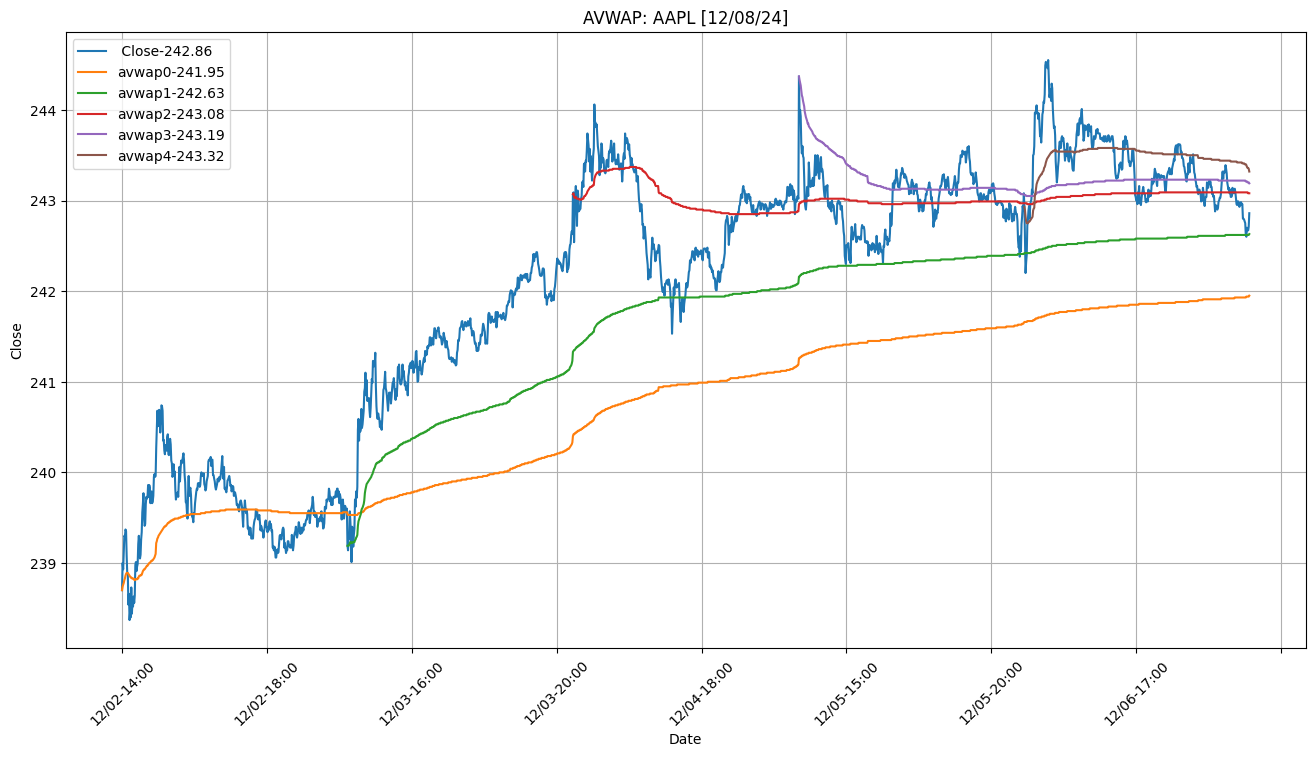

Getting plot for: AMD


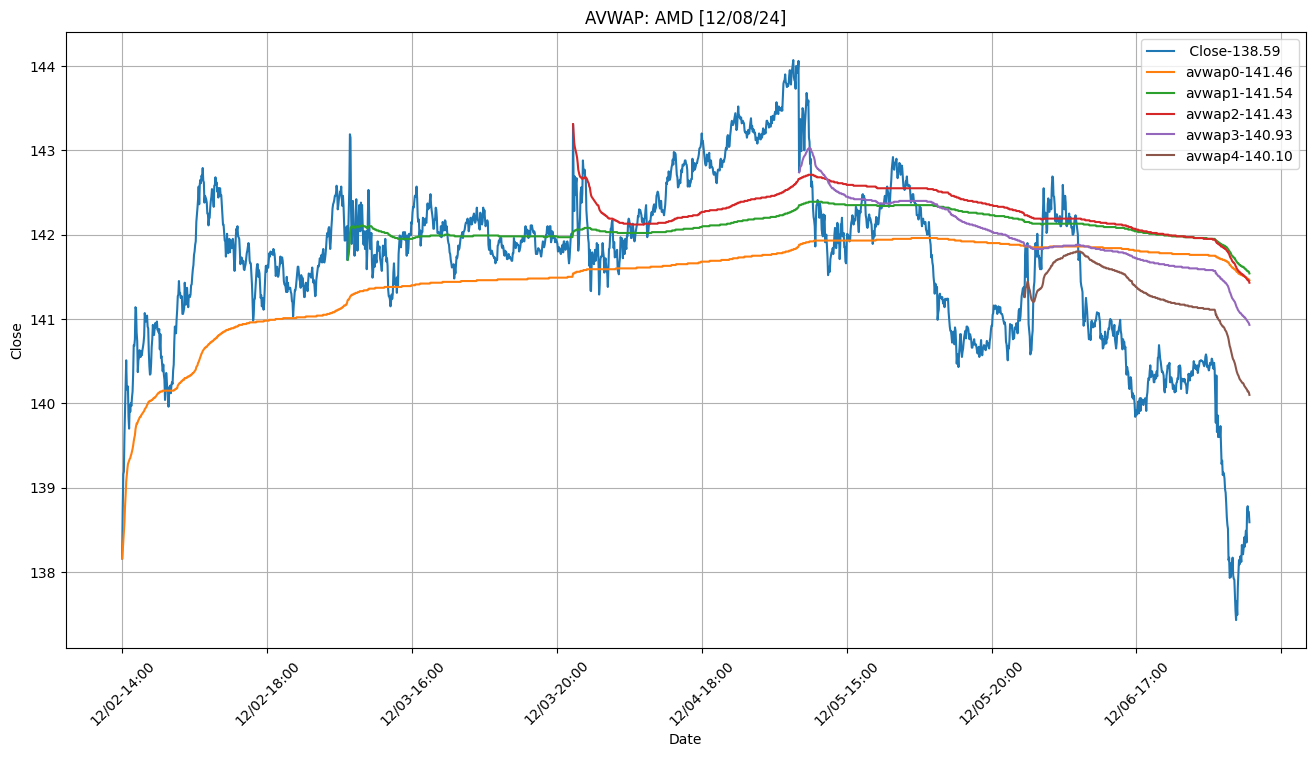

Getting plot for: AMZN


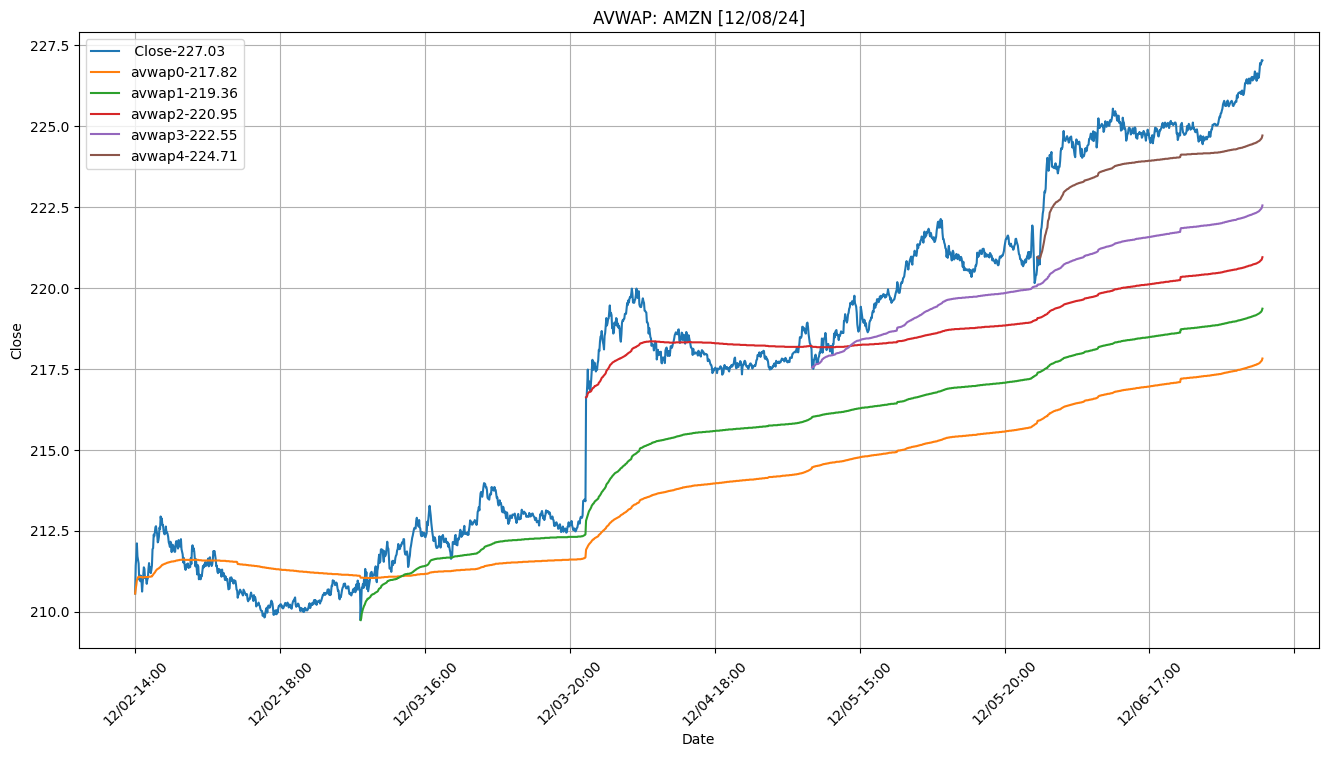

Getting plot for: COIN


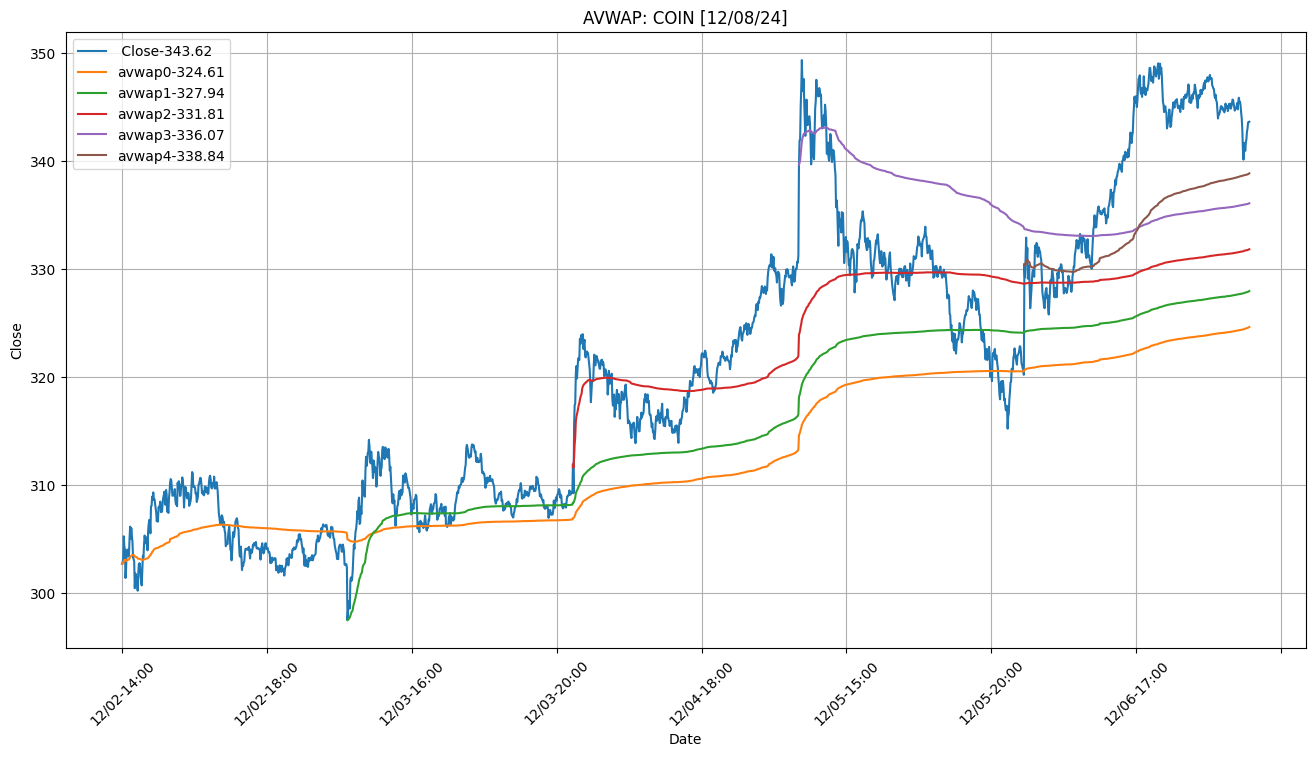

Getting plot for: GOOGL


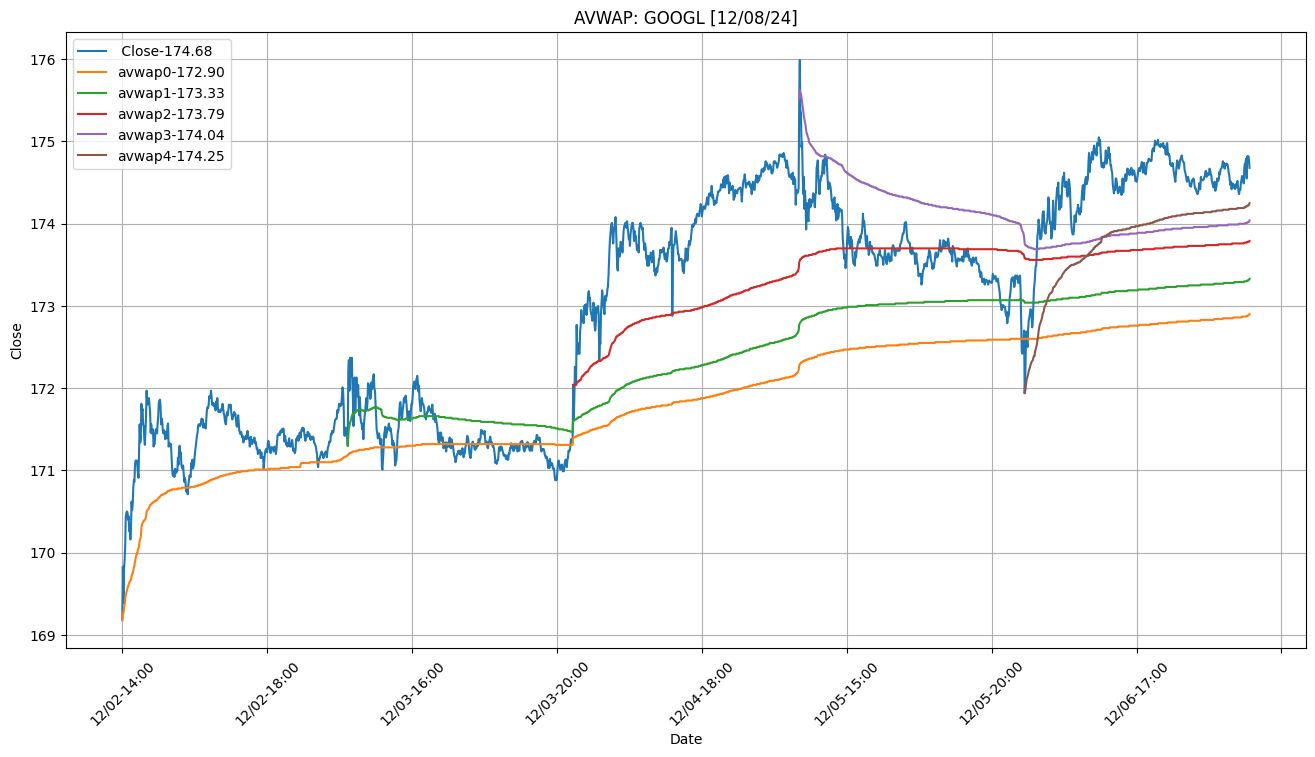

Getting plot for: META


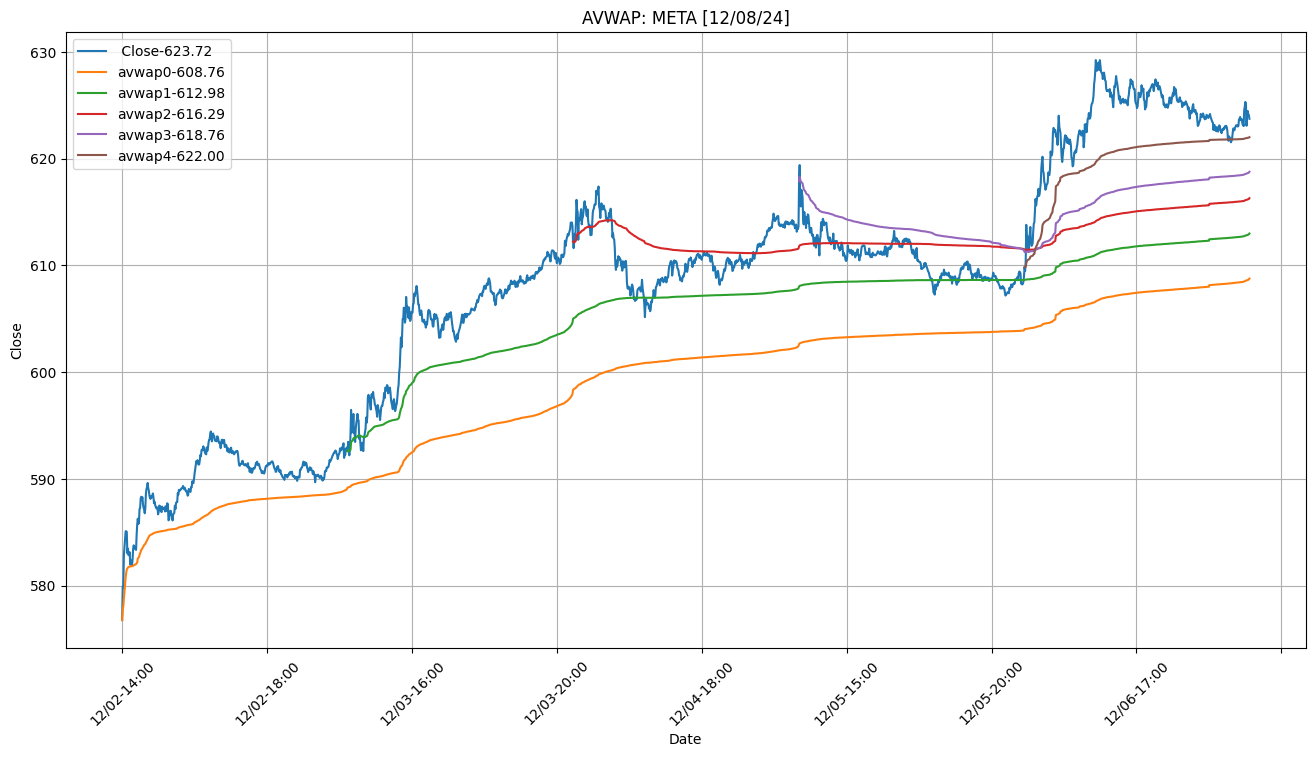

Getting plot for: MSFT


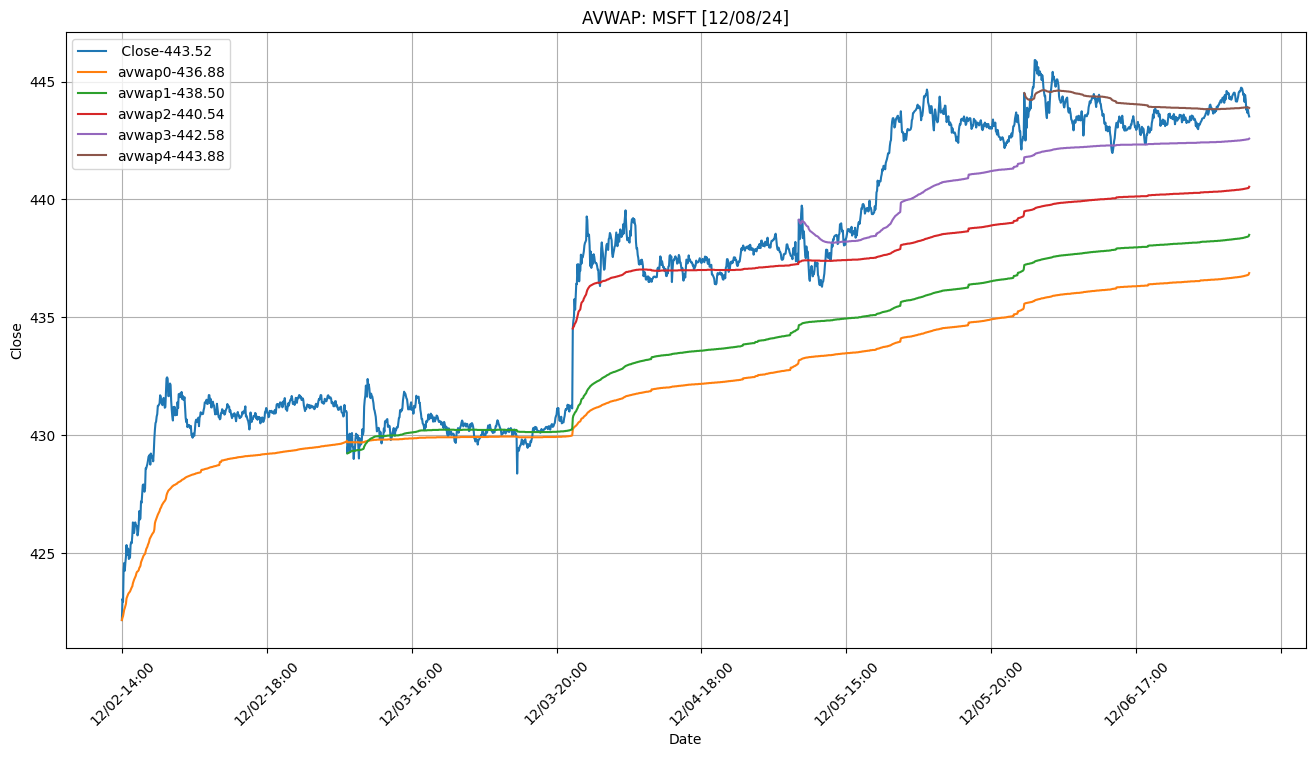

Getting plot for: MSTR


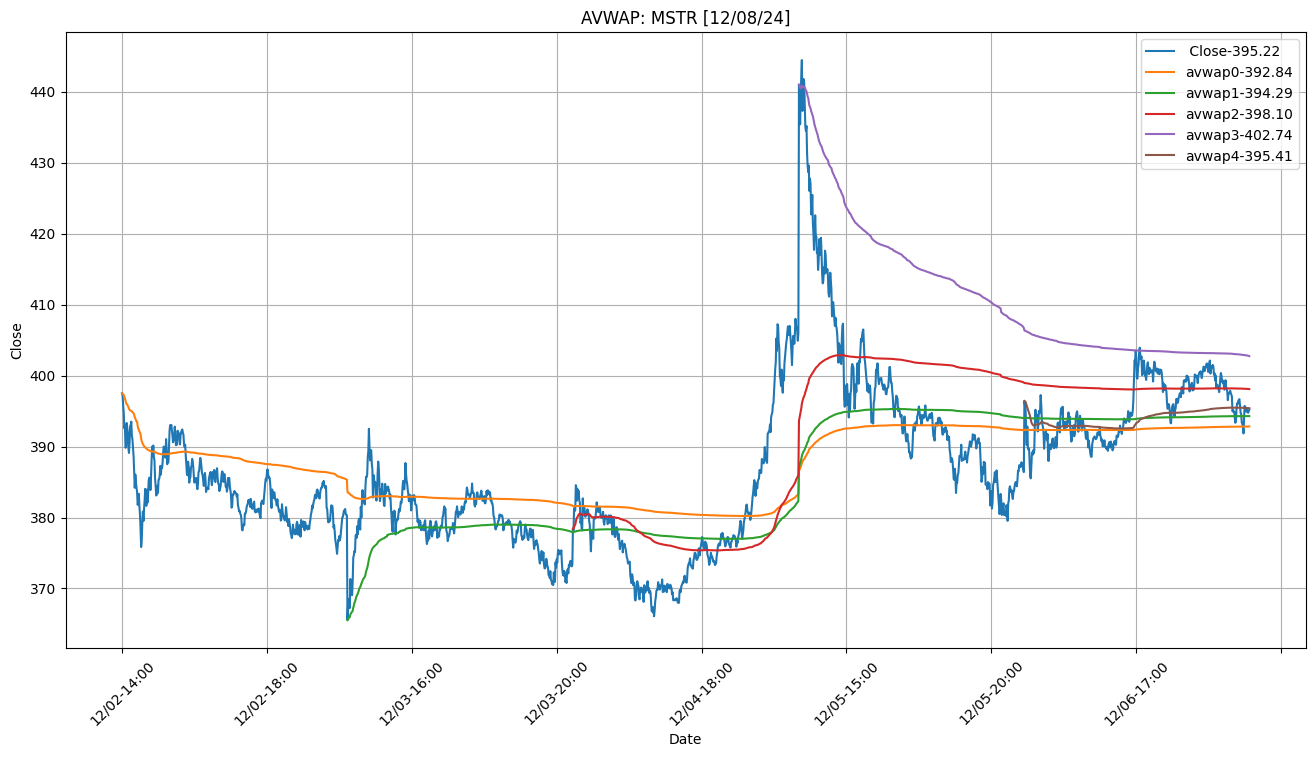

Getting plot for: NVDA


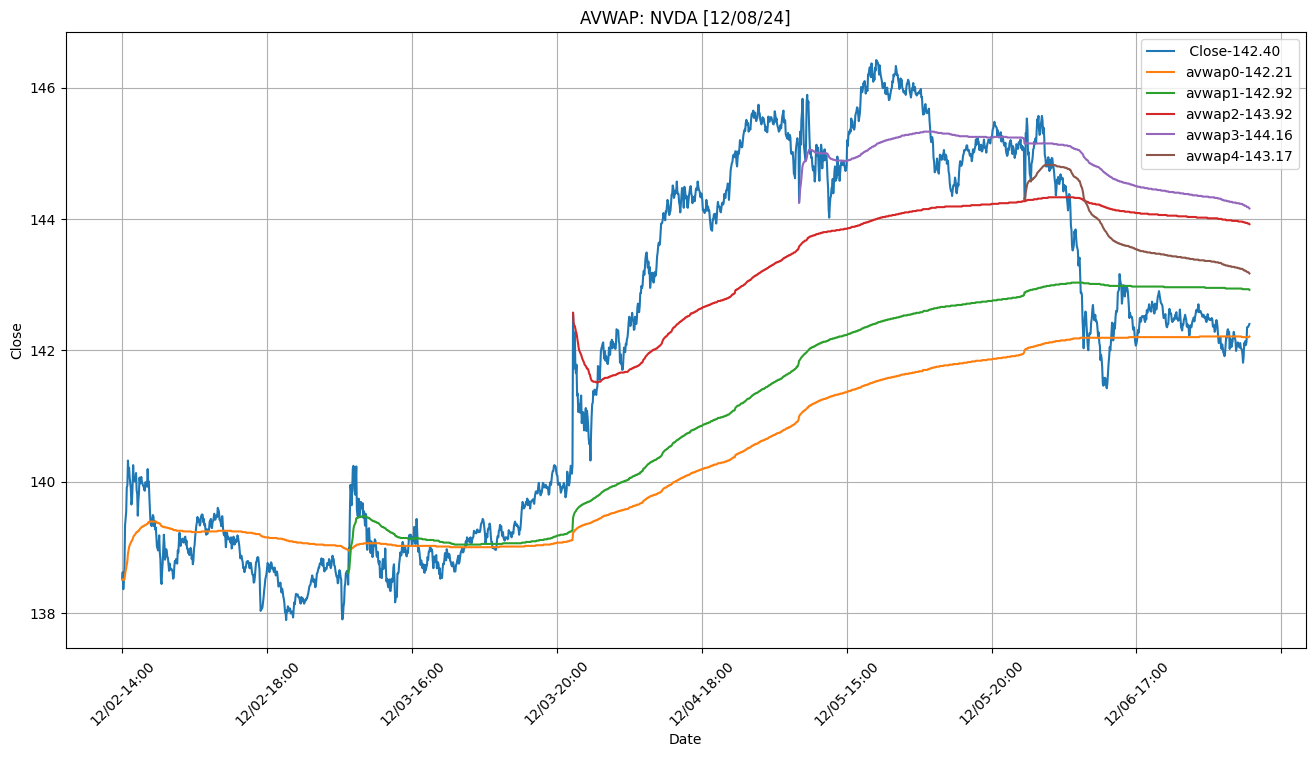

Getting plot for: SMCI


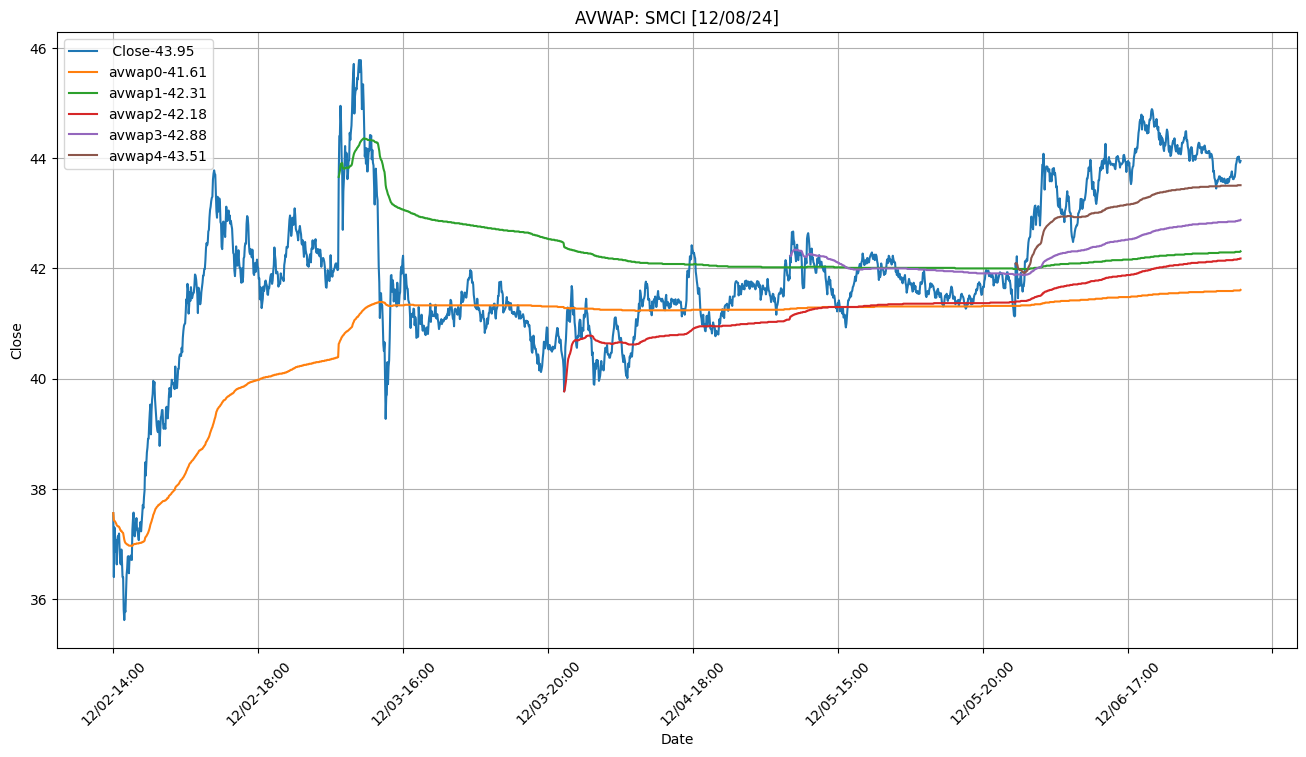

Getting plot for: TSLA


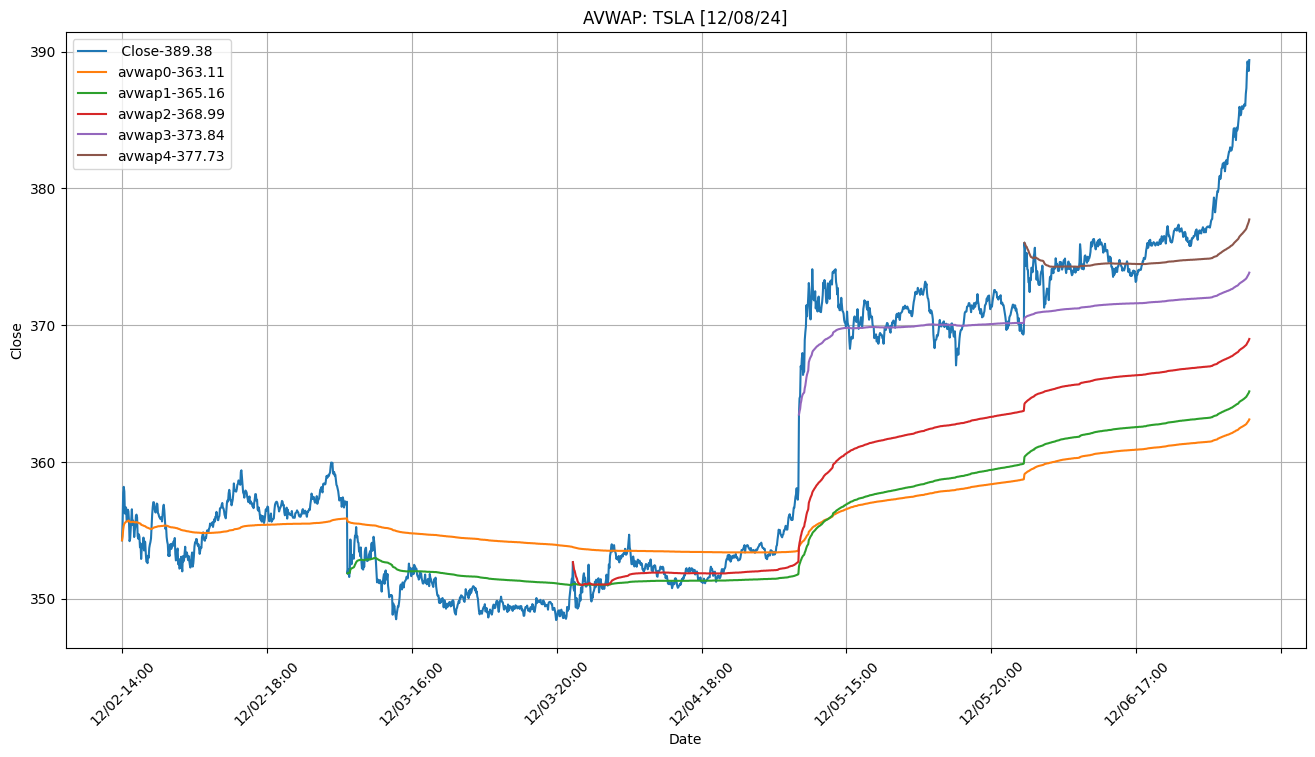

In [11]:
#individual vwap plots

for i in group_keys:
  print(f"Getting plot for: {i.upper()}")
  temp_df=grouped.get_group(i).copy()
  merged_df=get_merged_vwap(temp_df)
  #display(temp_df.head())
  #display(merged_df.head())
  get_vwap_plot(merged_df)